**Time Series Analysis**

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

Dataset Import

In [35]:
data = pd.read_csv("DataSet.csv", index_col="DATE",parse_dates= True)

Dataset Slicing

Plot Data

<Axes: xlabel='DATE'>

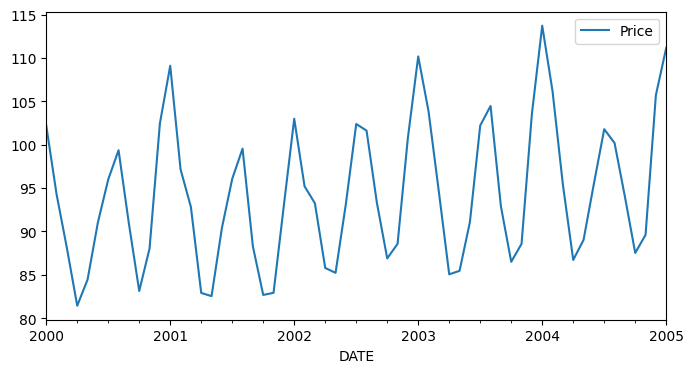

In [36]:
str_date = "01-01-2000"
end_date = "01-01-2005"

timeline = (data.index >= str_date) & (data.index <= end_date)
datatimeline = data.loc[timeline]
datatimeline.plot(figsize=(8,4))

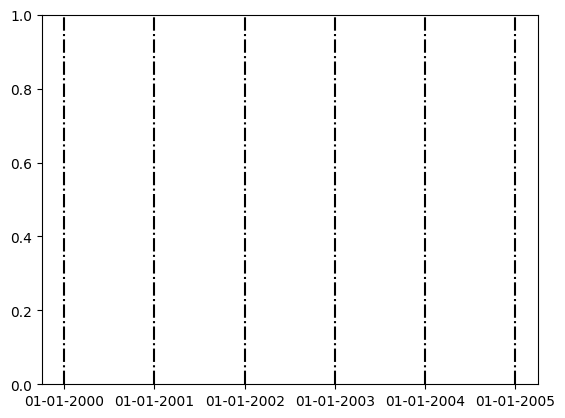

In [37]:
xcroods = ["01-01-2000","01-01-2001","01-01-2002","01-01-2003","01-01-2004","01-01-2005"]
for xc in xcroods:
    plt.axvline(x = xc,color="black", linestyle = "-.")

**Seasonality check**

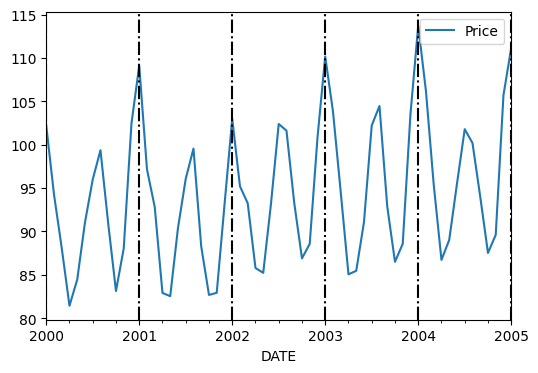

In [38]:
str_date = "01-01-2000"
end_date = "01-01-2005"

timeline = (data.index >= str_date) & (data.index <= end_date)
datatimeline = data.loc[timeline]
datatimeline.plot(figsize=(6,4))
xcroods = ["01-01-2000","01-01-2001","01-01-2002","01-01-2003","01-01-2004","01-01-2005"]
for xc in xcroods:
    plt.axvline(x = xc,color="black", linestyle = "-.")

Stationarity Check

In [39]:
def stationarity_test(series):
    result = adfuller(series,autolag = "AIC")
    label = ["Stationarity statistic", "p-value","#lag used","#observation"]
    out = pd.Series(result[0:4],index=label)
    print(out.to_string())
    if(result[1] <= 0.05):
        print("Data has no unit root and stationary")
    else:
        print("Data has unit root and non-stationary")

In [40]:
stationarity_test(data["Price"])

Stationarity statistic     -2.256990
p-value                     0.186215
#lag used                  15.000000
#observation              381.000000
Data has unit root and non-stationary


**Auto Correlation**

In [41]:
autocorelation_lag1 = data["Price"].autocorr(lag=1)
print("One month lag", autocorelation_lag1)

One month lag 0.8717308657532125


In [42]:
autocorelation_lag2 = data["Price"].autocorr(lag=2)
print("Two month lag", autocorelation_lag2)

Two month lag 0.6465816539907933


In [43]:
autocorelation_lag3 = data["Price"].autocorr(lag=3)
print("Three month lag", autocorelation_lag3)

Three month lag 0.5355867575850728


In [44]:
autocorelation_lag6 = data["Price"].autocorr(lag=6)
print("Six month lag", autocorelation_lag6)

Six month lag 0.9266842332406332


In [50]:
autocorelation_lag12 = data["Price"].autocorr(lag=10)
print("One Year lag", autocorelation_lag12)

One Year lag 0.6343337302105164


**Decomposition**